# Setup the directories

In [1]:
import os
base_dir = '/home/ayan/Documents/Computer Vision/Classification/Cat_Vs_Dog/cats_and_dogs_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Data Preprocessing using ImageDataGenerator
ImageDataGenerator converts image files into batches of preprocessed tensors
Note: A Python generator is an object that acts as an iterator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Rescale all pixel values between 0 - 255 to (1, 0)
train_idg = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True, )
test_idg = ImageDataGenerator(rescale = 1./255) #Validation images are not augmented

train_gen = train_idg.flow_from_directory(
    train_dir,
    target_size = (150, 150),       #resize images to (150, 150)
    batch_size = 32,                #32samples per batch i.e. shape = (32, 150, 150, 3)
    class_mode = 'binary'           #since this is a binary classification problem
)

valid_gen = test_idg.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Build the model in functional API way...for fun!
For simple Sequential type models this is not an effective way of representation. 
Wrote just for fun!!

Model: "cat-dog_functional_api_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 74, 74, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 72

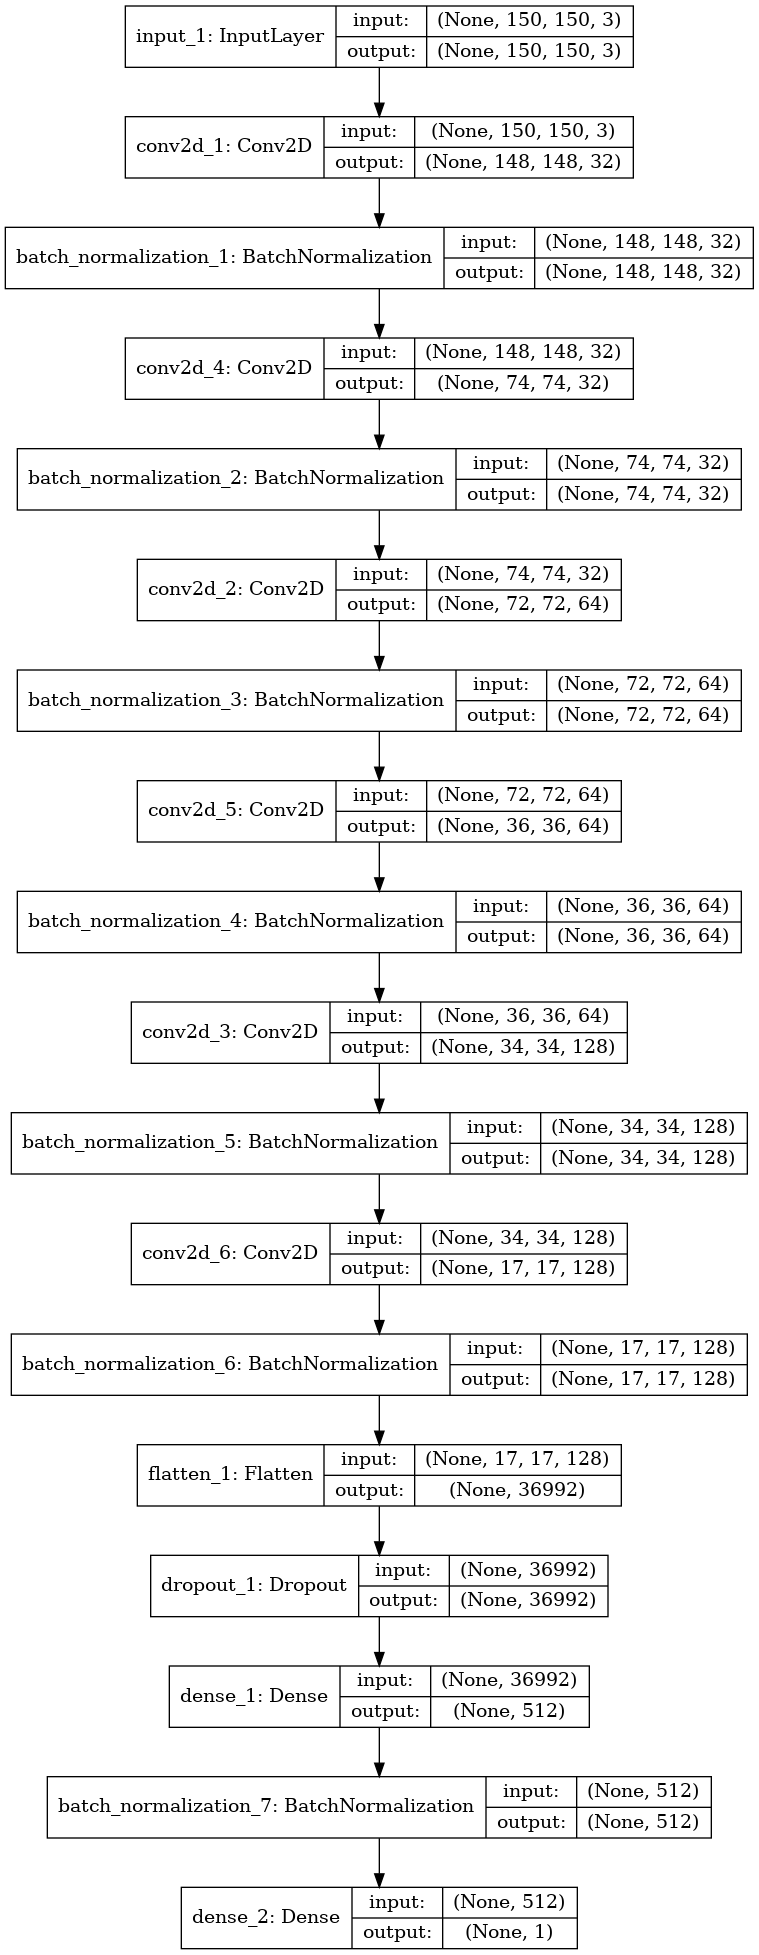

In [3]:
from keras import Input
from keras.layers import Conv2D, BatchNormalization, Flatten, Dropout, Dense
from keras import Model

image_inputs = Input(shape = (150, 150, 3))
conv32 = Conv2D(filters = 32, kernel_size = 3, activation = 'relu')
conv64 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu')
conv128 = Conv2D(filters = 128, kernel_size = 3, activation = 'relu')

conv32_st = Conv2D(filters = 32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu')
conv64_st = Conv2D(filters = 64, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu')
conv128_st = Conv2D(filters = 128, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu')
flatten = Flatten()
dropout = Dropout(0.1)
dense512 = Dense(512, activation = 'relu')

x = conv32(image_inputs) 
x = BatchNormalization()(x)
x = conv32_st(x)
x = BatchNormalization()(x)

x = conv64(x)
x = BatchNormalization()(x)
x = conv64_st(x)
x = BatchNormalization()(x)

x = conv128(x)
x = BatchNormalization()(x)
x = conv128_st(x)
x = BatchNormalization()(x)

x = flatten(x)
x = dropout(x)
x = dense512(x)
x = BatchNormalization()(x)
output = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = image_inputs, outputs = output, name = 'cat-dog_functional_api_model')

model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'functional_api_convnet.png')

# Setup & configure optimizers

In [4]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.Adam(lr = 1e-4),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

# Use batch generator
'steps_per_epoch' is for telling the fit_generator that it needs to run mentioned number of gradient descent steps before drawing the next epoch batch
'validation_steps' tells the process about number of batches to draw from the validation generator

In [5]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = 170,
    epochs = 100,
    validation_data = valid_gen,
    validation_steps = 50)

Epoch 1/100
170/170 [==============================] - 23s 136ms/step - loss: 1.0057 - binary_accuracy: 0.5868 - val_loss: 2.0422 - val_binary_accuracy: 0.4930
Epoch 2/100
170/170 [==============================] - 20s 120ms/step - loss: 0.6915 - binary_accuracy: 0.6426 - val_loss: 1.0202 - val_binary_accuracy: 0.5367
Epoch 3/100
170/170 [==============================] - 20s 118ms/step - loss: 0.6155 - binary_accuracy: 0.6766 - val_loss: 0.6820 - val_binary_accuracy: 0.6694
Epoch 4/100
170/170 [==============================] - 20s 117ms/step - loss: 0.5920 - binary_accuracy: 0.6851 - val_loss: 0.6038 - val_binary_accuracy: 0.6927
Epoch 5/100
170/170 [==============================] - 21s 122ms/step - loss: 0.5798 - binary_accuracy: 0.7071 - val_loss: 0.6403 - val_binary_accuracy: 0.7011
Epoch 6/100
170/170 [==============================] - 20s 120ms/step - loss: 0.5557 - binary_accuracy: 0.7176 - val_loss: 0.6685 - val_binary_accuracy: 0.6662
Epoch 7/100
170/170 [===================

Epoch 52/100
170/170 [==============================] - 21s 124ms/step - loss: 0.2315 - binary_accuracy: 0.9044 - val_loss: 0.3899 - val_binary_accuracy: 0.7951
Epoch 53/100
170/170 [==============================] - 20s 119ms/step - loss: 0.2176 - binary_accuracy: 0.9102 - val_loss: 0.2771 - val_binary_accuracy: 0.7786
Epoch 54/100
170/170 [==============================] - 20s 117ms/step - loss: 0.2263 - binary_accuracy: 0.9091 - val_loss: 0.2723 - val_binary_accuracy: 0.8235
Epoch 55/100
170/170 [==============================] - 20s 120ms/step - loss: 0.2130 - binary_accuracy: 0.9112 - val_loss: 0.5369 - val_binary_accuracy: 0.7735
Epoch 56/100
170/170 [==============================] - 20s 119ms/step - loss: 0.2060 - binary_accuracy: 0.9144 - val_loss: 0.5529 - val_binary_accuracy: 0.7932
Epoch 57/100
170/170 [==============================] - 20s 117ms/step - loss: 0.2059 - binary_accuracy: 0.9197 - val_loss: 0.5448 - val_binary_accuracy: 0.8196
Epoch 58/100
170/170 [============

# Display training vs validation 

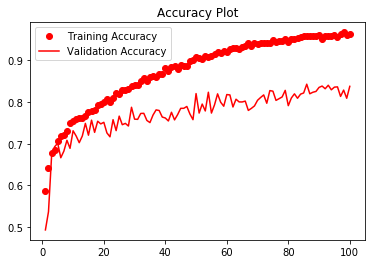

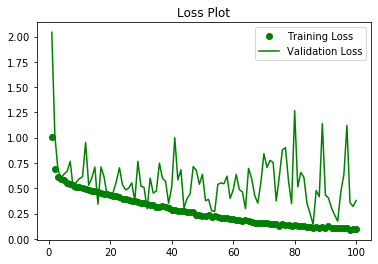

In [6]:
import matplotlib.pyplot as plt
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, 'go', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()